# Technical paper

Digging into the data while leading this project, I found and I learn interesting insights about music in general.
This technical aims at sharing these results and give possible ways forward to this project.

#### Import libraries & clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Datasets/Chords_clean.csv',index_col=0)

## 1. Average rating

The first insight I would like to share is about rating. Rating is a mark from zero to 5, five being the best score. As the top popular songs in terms of click were scraped, the ratings in the dataset are distributed as below:

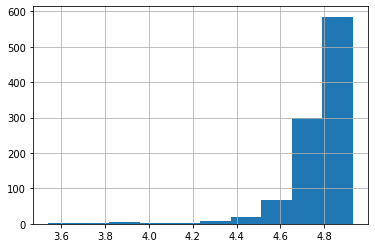

In [2]:
data.Rating.hist()
plt.show()

One can think people love easy songs as they are accessible to more guitarists than advanced songs that some can be played only by professional due to their complexity.

The graph below shows the average rating by level:

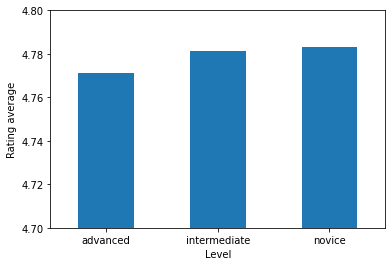

In [3]:
data.groupby("Level")["Rating"].mean().plot.bar()
plt.ylim(4.7,4.8)
plt.ylabel('Rating average')
plt.xticks(rotation=0)
plt.show()

Advanced songs have a slight lower average but the three levels have similar average scores.

## 2. Most popular artist and song

The rating is not a good popularity indicator as a score of 4 with 200 votes is not equivalent to a score of 4 with 10 000 votes.

The graph below shows the top artists according to the number of songs they have in the dataset (x-axis), the sum of the votes for those songs (y-axis) and the sum of the ratings (point size).

In that way the popularity is balanced by the number of votes and the number of songs.

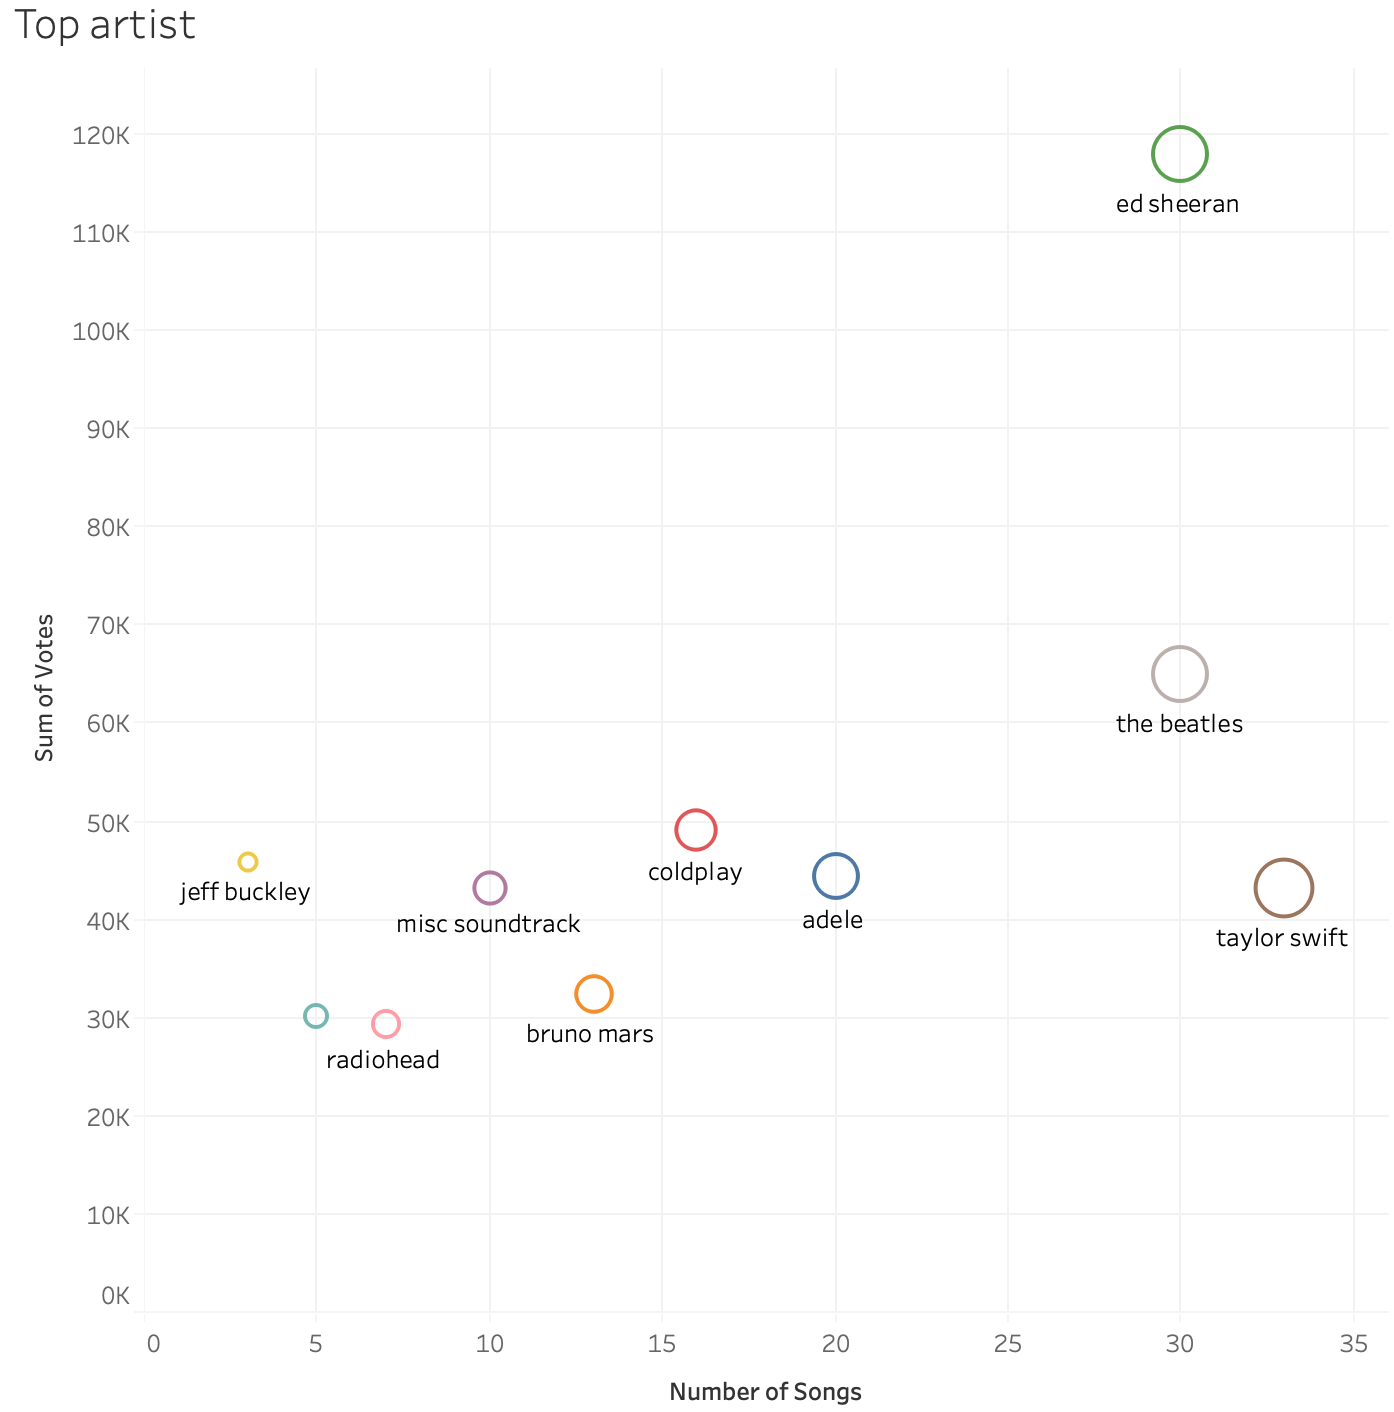

Same for the top songs in the dataset except that in that case, average rating is plotted versus the sum of the votes. The color indicate the level of the songs.

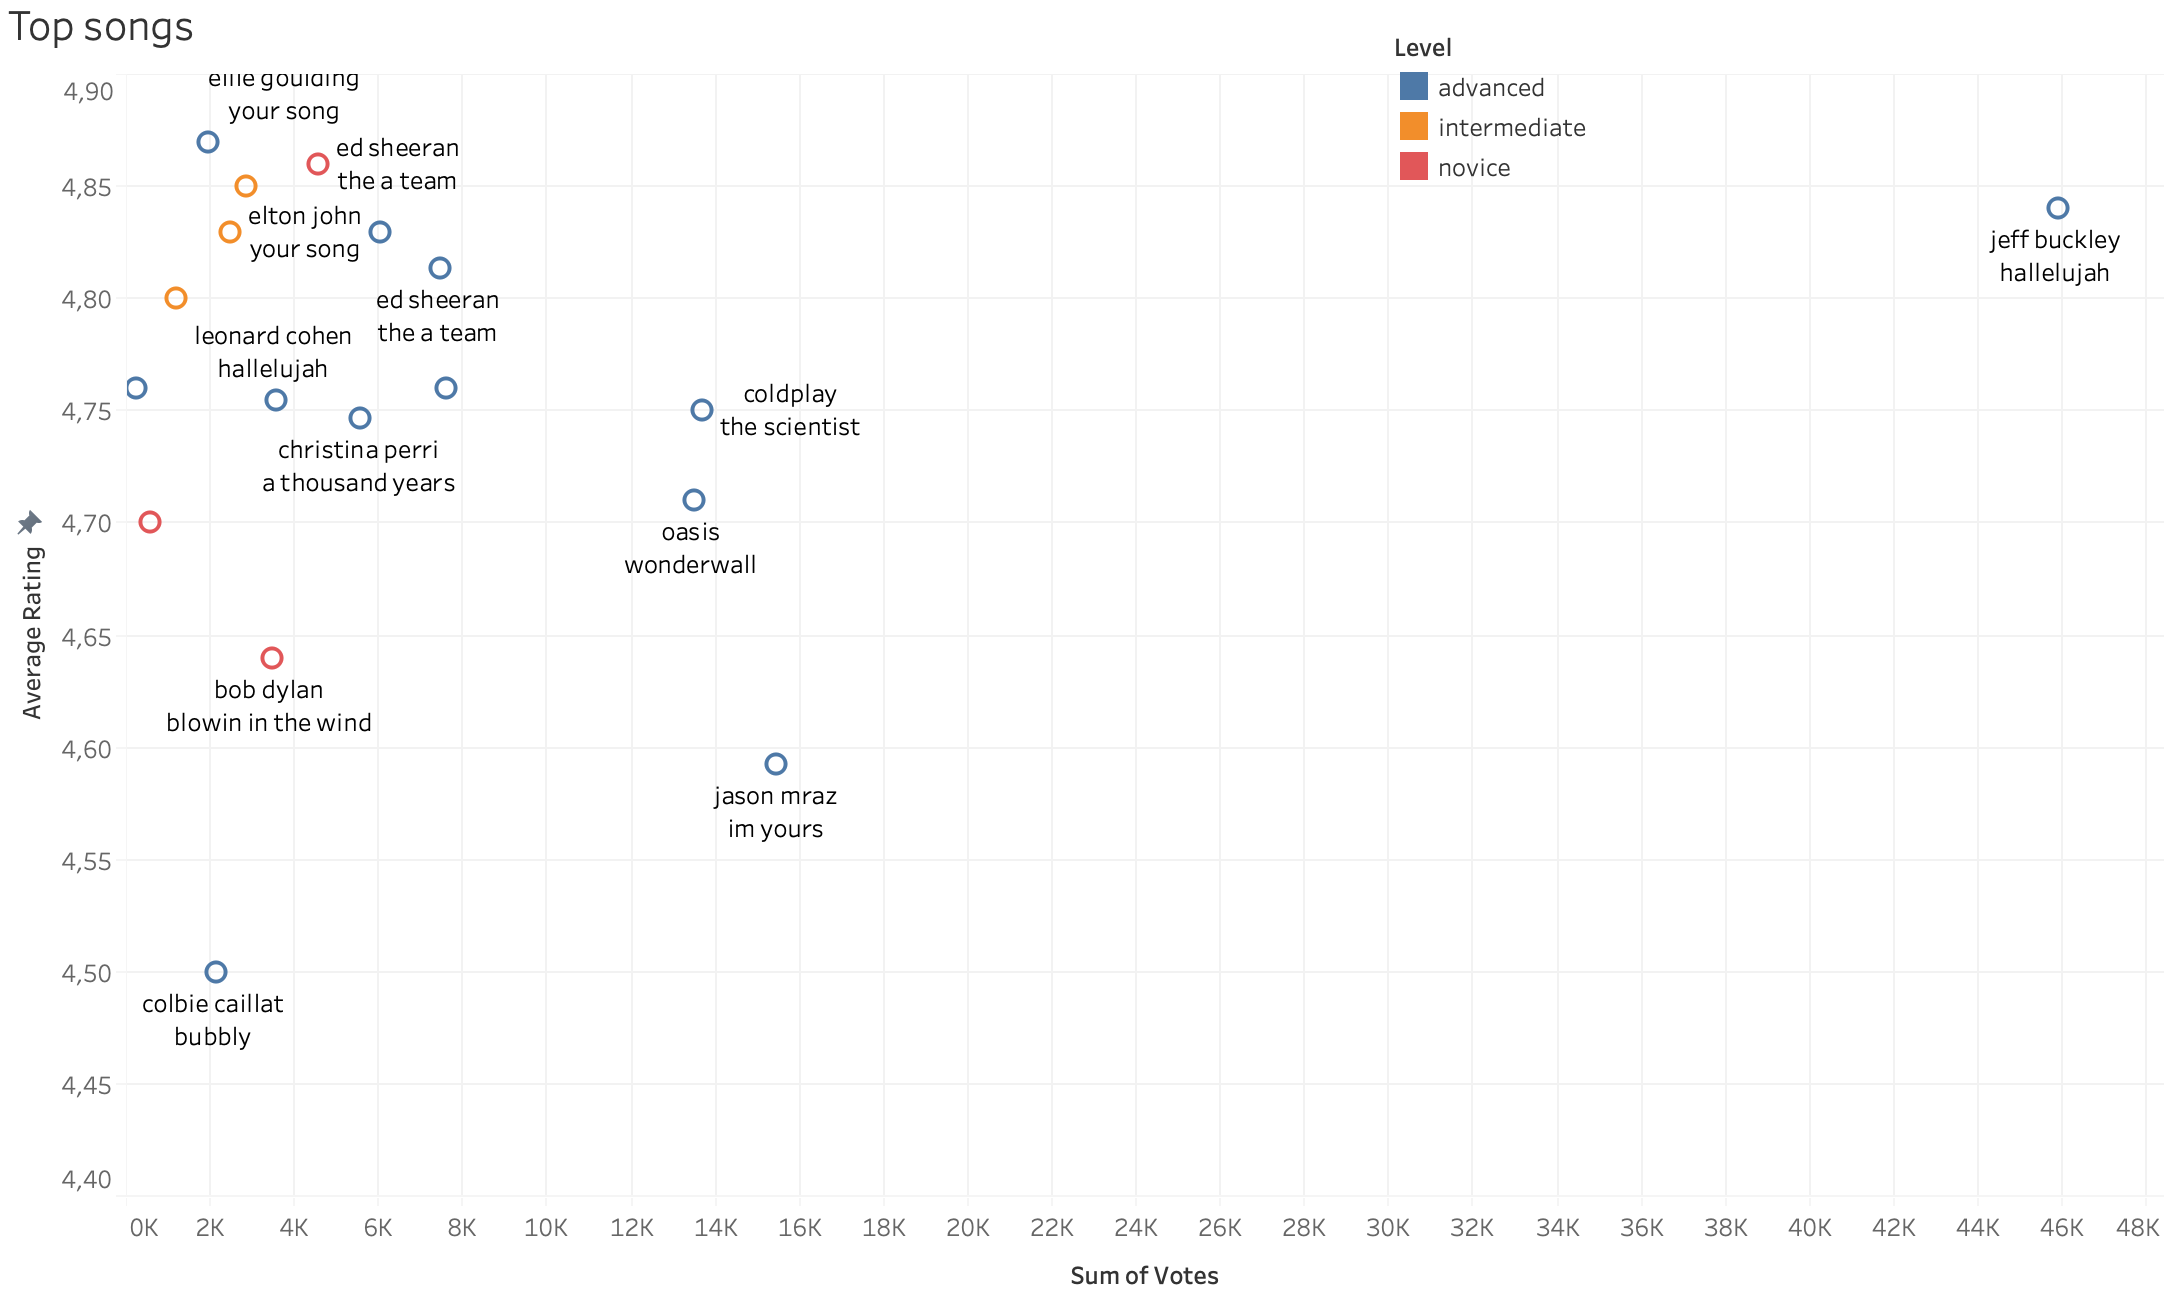

## 3. Way forward

Two way forwards can be investigated seperatly or combined:

- coupling the chords dataset with data from spotify to develop the features for each song
- looking at the correlation between chords

I actually looked at the second option as I encoded the chords in my dataset and I looked at the correlation between the ten most frequent chords. The heatmap below illustrate the correlation matrix:

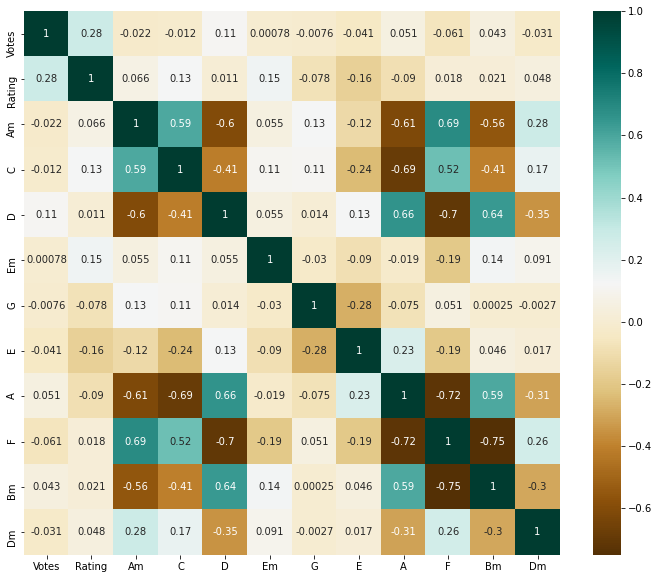

In [4]:
intermediate = data[(data["Level"]=="intermediate")]

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(intermediate[['Votes','Rating','Am','C','D','Em','G','E','A','F','Bm','Dm']].corr(), cmap="BrBG" , annot=True)
plt.show()

On the heatmap above, four "main" blocks with high correlation show up. Those blocks reflect the modes of the chords which is in few words the best sequence of chords for the ears. You can learn more about modes on the following link: https://www.guitarlessonworld.com/lessons/modes/

One of the way forward could be then to look at the different modes vs the music genre. May be new modes can comes up or one can explain why some modes are more plaisant for the ears than others.